# Function to Fetch and Load the Data

In [45]:
import pandas as pd
import tarfile
from pathlib import Path
import urllib.request

def load_housing_data():
    tarball_path=Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path('datasets').mkdir(parents=True,exist_ok=True)
        url="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv("datasets/housing/housing.csv")
        
housing=load_housing_data()

In [46]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Visualiztion of Data

In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [48]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


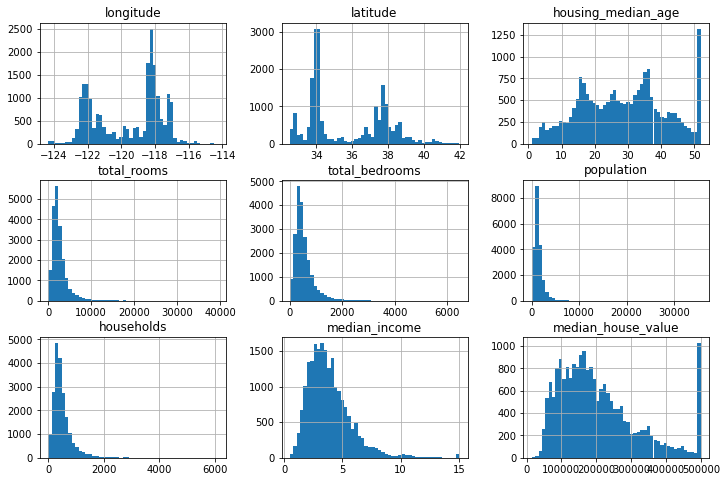

In [49]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,8))
plt.show()

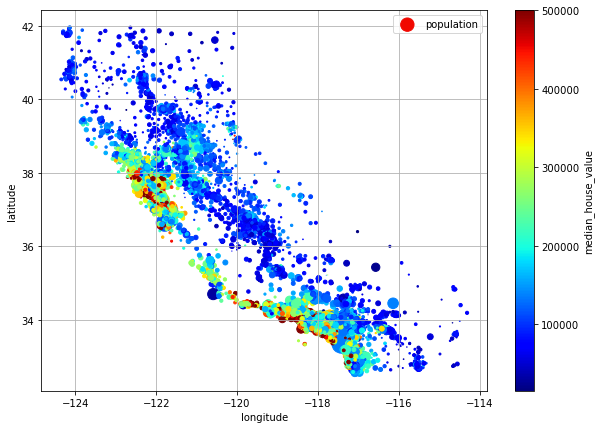

In [50]:
# Price

housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,s=housing["population"]/100,label="population",c="median_house_value"
            ,cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,7))
plt.show()

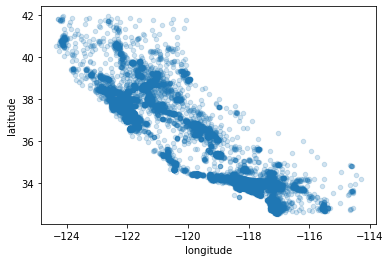

In [51]:
# visualizing geographical data 
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.2)
plt.show()

In [52]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

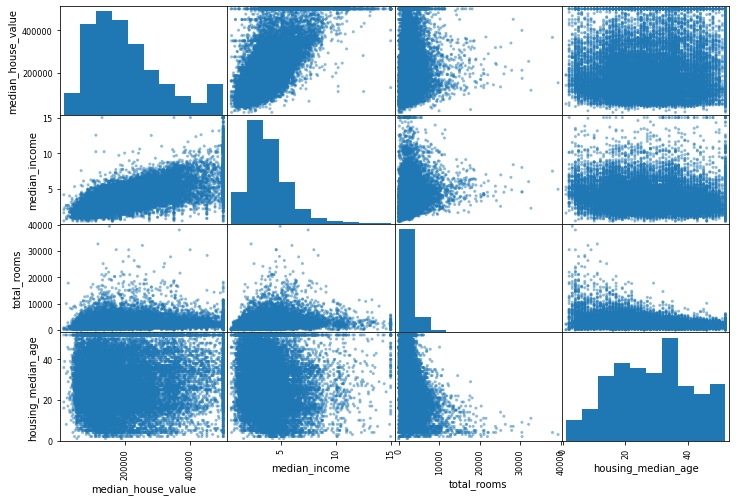

In [53]:
corr_matrix["median_house_value"].sort_values(ascending=False)
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

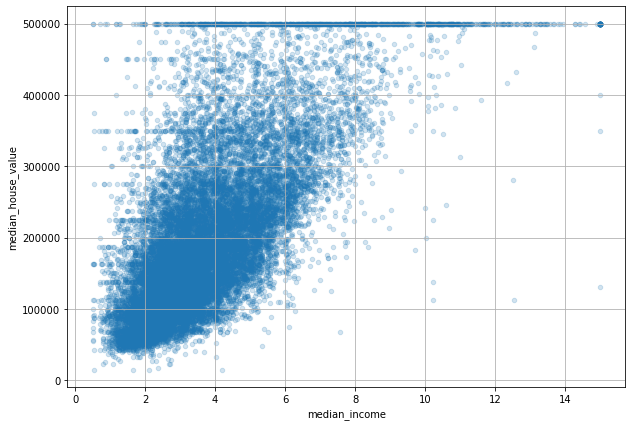

In [54]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.2,grid=True,figsize=(10,7))
plt.show()

# Splitting into training and test set

In [55]:
# Hashing

from zlib import crc32

def is_id_in_test_set(id_,test_ratio):
    return crc32(np.int64(id_)<test_ratio*2**32)

def split_data_with_id_hash(data,test_ratio,id_column):
    ids=data["index"]
    in_test_set=ids.apply(lambda id_:is_id_in_test_set(id_,test_ratio))
    return data.iloc[~in_test_set],data.iloc[in_test_set]

housing_with_id=housing.reset_index()
housing_with_id["id"]=housing['longitude']*1000+housing["latitude"]
#train_setH,test_setH=split_data_with_id_hash(housing_with_id,0.2,"index")

crc32 stands for cyclic redundancy check 32-bit. It is a hash function that calculates a checksum value (a fixed-size numerical representation) for a given input data. The CRC-32 algorithm is commonly used for error detection in data transmission or storage systems.

The zlib module is a built-in module in Python that provides functions for data compression and decompression using the zlib library. Among its functions, crc32 is one of them.

To use the crc32 function, you can pass a byte string as an argument, and it will return a 32-bit checksum value calculated using the CRC-32 algorithm. Here's an example:

In [56]:
#Random shuffling

import numpy as np

def shuffle_and_split_data(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
train_setR,test_setR=shuffle_and_split_data(housing,0.2)

In [57]:
len(train_setR),len(test_setR)
#The problem with above splitting is whenever we run the program it will create a different test set. Over time algorithm will get to see the whole datasets

(16512, 4128)

# Stratified Sampling

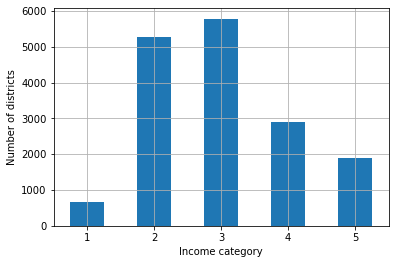

In [75]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [77]:
housing["rooms_per_house"]=housing["total_rooms"]/housing["households"]
housing["bedroom_ratio"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"]=housing["population"]/housing["households"]

In [78]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,3.211799,0.335742,1.524178,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5.504202,0.180153,1.865546,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,5.334975,0.200369,2.768473,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,5.351282,0.203881,2.365385,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3.725256,0.277371,1.631399,3


In [80]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing["income_cat"]):
    strat_train_set_n=housing.iloc[train_index]
    strat_test_set_n=housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])

In [81]:
strat_train_set,start_test_set=strat_splits[0]

In [82]:
from sklearn.model_selection import train_test_split
strat_train_set,strat_test_set=train_test_split(housing,test_size=0.2,stratify=housing['income_cat'],random_state=42)

In [83]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350590
2    0.318801
4    0.176203
5    0.114441
1    0.039964
Name: income_cat, dtype: float64

In [84]:
housing["income_cat"].value_counts()/len(housing)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [85]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318873
4    0.176319
5    0.114467
1    0.039746
Name: income_cat, dtype: float64

proprotions are alomost identical

In [87]:
# # removing column income_cat
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)
    housing=strat_train_set.copy()
housing.head()
strat_test_set.shape

(3303, 13)

In [89]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
2875,-122.08,37.63,34.0,1619.0,293.0,1148.0,310.0,4.0326,164700.0,NEAR BAY,5.222581,0.180976,3.703226
15098,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383,166200.0,<1H OCEAN,4.658879,0.210130,3.483645
11562,-122.40,37.78,32.0,352.0,132.0,313.0,105.0,2.5742,350000.0,NEAR BAY,3.352381,0.375000,2.980952
14648,-122.37,37.95,35.0,215.0,45.0,100.0,34.0,1.6023,81300.0,NEAR BAY,6.323529,0.209302,2.941176
1148,-122.17,37.74,43.0,818.0,193.0,494.0,179.0,2.4776,101600.0,NEAR BAY,4.569832,0.235941,2.759777


In [91]:
housing=strat_train_set.copy()

In [95]:
housing_labels=housing[["median_house_value"]]

In [96]:
housing=housing.drop('median_house_value',axis=1)

In [98]:
housing.shape

(13209, 12)

### Cleaning of Data

In [101]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
housing_num=housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)
imputer.statistics_.round(2)

array([-1.1852e+02,  3.4270e+01,  2.9000e+01,  2.1200e+03,  4.3200e+02,
        1.1630e+03,  4.0700e+02,  3.5400e+00,  5.2300e+00,  2.0000e-01,
        2.8100e+00])

In [102]:
housing_num.median()

longitude             -118.520000
latitude                34.270000
housing_median_age      29.000000
total_rooms           2120.000000
total_bedrooms         432.000000
population            1163.000000
households             407.000000
median_income            3.535000
rooms_per_house          5.234649
bedroom_ratio            0.203125
people_per_house         2.814016
dtype: float64

In [103]:
X=imputer.transform(housing_num)  ## transform the training set by replacing missing values

In [104]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [105]:
# housing_tr.isnull().sum()
# housing_num.isnull().sum()

In [106]:
## Handling text and categorical attribute
housing_cat=housing[['ocean_proximity']]
housing_cat.head(8)

,ocean_proximity
2875,NEAR BAY
15098,<1H OCEAN
11562,NEAR BAY
14648,NEAR BAY
1148,NEAR BAY
16163,INLAND
5271,<1H OCEAN
14032,NEAR OCEAN


Encoding

In [107]:
# issue- algorithm will assume that two nearby values are more similar than two distant values
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [3.],
       [3.],
       [3.],
       [1.],
       [0.],
       [4.]])

In [108]:
ordinal_encoder.categories

'auto'

In [109]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [110]:
housing_cat_1hot

<13209x5 sparse matrix of type '<class 'numpy.float64'>'
	with 13209 stored elements in Compressed Sparse Row format>

In [111]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [112]:
cat_encoder.categories

'auto'

## Feature Scalling and Transformation

In [113]:
# Min Max Scaler

from sklearn.preprocessing import MinMaxScaler  ## subtracting the min value and dividing by (max-min)
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)

In [114]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler  ## subtracting the mean value and dividing by 
#standard deviation (standardized data has mean=0 and std_deviation=1)
std_scaler=StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_num)

In [115]:
len(housing_num_std_scaled)

13209

In [116]:
len(housing_labels)

13209

In [117]:
# inverse transform
from sklearn.linear_model import LinearRegression
target_scaler=StandardScaler()
scaled_labels=target_scaler.fit_transform(housing_labels)
model=LinearRegression()
model.fit(housing[['median_income']],scaled_labels)
some_new_data=housing[["median_income"]].iloc[:5]
scaled_predictions=model.predict(some_new_data)
predictions=target_scaler.inverse_transform(scaled_predictions)
predictions

array([[213832.2666107 ],
       [201411.62466585],
       [152281.92949765],
       [111263.8462282 ],
       [148205.02154022]])

In [118]:
# other mathod to do this

from sklearn.compose import TransformedTargetRegressor
model=TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())
model.fit(housing[['median_income']],housing_labels)
predictions=model.predict(some_new_data)
predictions

array([[213832.2666107 ],
       [201411.62466585],
       [152281.92949765],
       [111263.8462282 ],
       [148205.02154022]])

### Custom Transformer

In [119]:
from sklearn.preprocessing import FunctionTransformer
log_transformer=FunctionTransformer(np.log,inverse_func=np.exp)
log_pop=log_transformer.transform(housing[['population']]) 

In [120]:
from sklearn.metrics.pairwise import rbf_kernel
rbf_transformer=FunctionTransformer(rbf_kernel,kw_args=dict(Y=[[35.]],gamma=0.1))
age_simil_35=rbf_transformer.transform(housing[['housing_median_age']])
age_simil_35

array([[9.04837418e-01],
       [1.00000000e+00],
       [4.06569660e-01],
       ...,
       [5.57390369e-07],
       [4.24835426e-18],
       [9.04837418e-01]])

###### Custom Transformer for StandardScaler

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array,check_is_fitted

class StandardScalerClone(BaseEstimator,TransformerMixin):
    def __init__(self,with_mean=True):
        self.with_mean=with_mean
    def fit(self,X,y=None):
        X=check_array(X)
        self.mean=X.mean(axis=0)
        self.scale_=X.std(axis=0)
        self.n_features_in_=X.shape[1]
        return self
    def transform(self,X):
        check_is_fitted(self)
        X=check_array(X)
        assert self.n_feature_in_ == X.shape[1]
        
        if self.with_mean:
            X=X-self.mean_
        return X/self.scale_

###### Kmeans Transformer

In [122]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator,TransformerMixin):
    def __init__(self,n_clusters=10,gamma=1.0,random_state=None):
        self.n_clusters=n_clusters
        self.gamma=gamma
        self.random_state=random_state
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_=KMeans(self.n_clusters,random_state=self.random_state)
        self.kmeans_.fit(X,sample_weight=sample_weight)
        return self
    
    def transform(self,X):
        return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma)
    
    def get_feature_names_out(self,names=None):
        return [f"cluster {i} similarity" for i in range(self.n_clusters)]

In [128]:
housing_labels=np.array(housing_labels)
housing_labels=np.ravel(housing_labels)

In [129]:
cluster_simil=ClusterSimilarity(n_clusters=10,gamma=1.,random_state=42)
similarities=cluster_simil.fit_transform(housing[["latitude","longitude"]],sample_weight=housing_labels)
similarities[:3].round(2)

array([[0.85, 0.  , 0.88, 0.  , 0.  , 0.11, 0.  , 0.  , 0.31, 0.  ],
       [0.  , 0.93, 0.  , 0.9 , 0.  , 0.  , 0.13, 0.  , 0.  , 0.04],
       [0.62, 0.  , 0.99, 0.  , 0.  , 0.08, 0.  , 0.  , 0.15, 0.  ]])

#### Transformation Pipeline

In [130]:
from sklearn.pipeline import Pipeline
num_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("standardize",StandardScaler())
])

In [131]:
# if we dont want to name the tarnsformers then use make_pipeline
from sklearn.pipeline import make_pipeline
num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [132]:
housing_num_prepared=num_pipeline.fit_transform(housing_num)
housing_num_prepared[0:2].round(2)

array([[-1.24,  0.93,  0.42, -0.46, -0.57, -0.25, -0.49,  0.09, -0.08,
        -0.55,  0.14],
       [ 0.75, -0.81,  0.5 , -0.29, -0.28,  0.06, -0.18, -0.07, -0.3 ,
        -0.05,  0.1 ]])

In [133]:
from sklearn.compose import ColumnTransformer
num_attribs=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
cat_attribs=["ocean_proximity"]
cat_pipeline=make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
preprocessing=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",cat_pipeline,cat_attribs)
])

In [134]:
from sklearn.compose import make_column_selector,make_column_transformer
# make_column_selector: returns a selector function
# make_column_transformer: Choose names

preprocessing=make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include=np.number)),
    (cat_pipeline,make_column_selector(dtype_include=object)),
)

In [135]:
housing_prepared=preprocessing.fit_transform(housing)
housing_prepared[0]

array([-1.24288416,  0.92703371,  0.42318437, -0.46221803, -0.5739128 ,
       -0.24809339, -0.4903613 ,  0.08852083, -0.08111635, -0.55442129,
        0.13983341,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ])

In [136]:
def column_ratio(X):
    return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer,feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, validate=False),
        StandardScaler())
log_pipeline=make_pipeline(
    SimpleImputer(strategy="median"),
     FunctionTransformer(column_ratio, validate=False),
    StandardScaler())

cluster_simil=ClusterSimilarity(n_clusters=10,gamma=1.,random_state=42)
default_num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

preprocessing=ColumnTransformer([
    ("bedrooms",ratio_pipeline(),["total_bedrooms","total_rooms"]),
    ("rooms_per_house",ratio_pipeline(),["total_rooms","households"]),
    ("people_per_house",ratio_pipeline(),["population","households"]),
    ("log",log_pipeline,["total_bedrooms","total_rooms","population","households","median_income"]),
    ("geo",cluster_simil,["latitude","longitude"]),
    ("cat",cat_pipeline,make_column_selector(dtype_include=object)),
],
    remainder=default_num_pipeline)

In [137]:
housing_prepared=preprocessing.fit_transform(housing)
housing_prepared.shape

(13209, 23)

### Select and Train a Model

##### Linear Regression

In [138]:
from sklearn.linear_model import LinearRegression
lin_reg=make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_labels)
housing_predictions=lin_reg.predict(housing)

In [139]:
housing_predictions[:5].round(-2) # rounded to nearest hundred

array([297800., 248000., 165300., 261300., 254100.])

In [141]:
housing_labels[:5]

array([164700., 166200., 350000.,  81300., 101600.])

In [142]:
from sklearn.metrics import mean_squared_error
lin_rmse=mean_squared_error(housing_labels,housing_predictions,squared=False)
lin_rmse

86515.2363531714

In [143]:
from sklearn.model_selection import cross_val_score
tree_rmse=-cross_val_score(lin_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)

In [144]:
pd.Series(tree_rmse).describe()

count    1.000000e+01
mean     6.739892e+12
std      2.131341e+13
min      7.935062e+04
25%      8.480148e+04
50%      8.824092e+04
75%      9.160501e+04
max      6.739892e+13
dtype: float64

###### Decision Trees

In [145]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing,housing_labels)

housing_predictions=tree_reg.predict(housing)
tree_rmse=mean_squared_error(housing_labels,housing_predictions,squared=False)
tree_rmse

#overfitting

0.0

###### Cross Validation

In [146]:
from sklearn.model_selection import cross_val_score
tree_rmse=-cross_val_score(tree_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)

In [147]:
pd.Series(tree_rmse).describe()

count       10.000000
mean     66748.074850
std       3646.540258
min      60243.977384
25%      64736.402582
50%      67109.051590
75%      69714.855617
max      70834.614440
dtype: float64

### Random Forest 

In [148]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_rmses=-cross_val_score(forest_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)
pd.Series(forest_rmses).describe()

count       10.000000
mean     47545.001459
std       2970.163543
min      41736.764444
25%      45874.196955
50%      47131.657921
75%      49640.900534
max      51291.747180
dtype: float64

### Fine Tuning

#### Grid Search

In [152]:
from sklearn.model_selection import GridSearchCV
full_pipeline=Pipeline([
    ("preprocessing",preprocessing),
    ("random_forest",RandomForestRegressor(random_state=42)),
])

# param_grid=[
#     {'preprocessing__geo__n_clusters':[5,8,10],
#     'random_forest__max_features':[4,6,8]},
#     {'preprocessing__geo__n_clusters':[10,15,18,20],
#     'random_forest__max_features':[6,8,10]},
# ]
# housing_labels=housing_labels.ravel()
# grid_search=GridSearchCV(full_pipeline,param_grid,cv=3,scoring='neg_root_mean_squared_error')
# grid_search.fit(housing,housing_labels)

In [ ]:
grid_search.best_params_

In [ ]:
cv_res=pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score",ascending=False,inplace=True)
[...]
cv_res.head()

#### Random Search

In [153]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
params_distribs={'preprocessing__geo__n_clusters':randint(low=3,high=50),
                'random_forest__max_features':randint(low=2,high=20)}
rnd_search=RandomizedSearchCV(
    full_pipeline,param_distributions=params_distribs,n_iter=10,cv=3,scoring='neg_root_mean_squared_error',random_state=42)

rnd_search.fit(housing,housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
   

In [154]:
final_model=rnd_search.best_estimator_
feature_importances=final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.05, 0.04, 0.03, 0.05, 0.01, 0.02, 0.03, 0.01, 0.02, 0.01, 0.01,
       0.02, 0.01, 0.02, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.03,
       0.02, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.02, 0.03,
       0.01, 0.01, 0.02, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02,
       0.02, 0.01, 0.01, 0.06, 0.  , 0.  , 0.  , 0.01, 0.04, 0.05, 0.03])

In [ ]:
# sorted(zip(feature_importances),reverse=True)

## Evaluating on the Test Set

In [155]:
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set['median_house_value'].copy()
final_predictions=final_model.predict(X_test)

In [158]:
final_rmse=mean_squared_error(y_test,final_predictions,squared=False)

In [159]:
final_rmse

42804.992291058516

In [161]:
from scipy import stats
confidence=0.95

squared_errors=(final_predictions-y_test)**2

np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([40388.82667333, 45091.8774285 ])

In [162]:
import joblib

joblib.dump(final_model,"my_california_housing_model.pkl")

['my_california_housing_model.pkl']